In [2]:
from si import *

from g2Reader import *
from g2Fitter import *

Not a jupyter notebook. Not enabling notebook functions.
Welcome to JupyROOT 6.22/00
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


/home/jlab/miniconda3/lib/python3.7/site-packages/ROOT/_facade.py:121: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  return _orig_ihook(name, *args, **kwds)
/home/jlab/miniconda3/lib/python3.7/site-packages/luigi/scheduler.py:211: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  class OrderedSet(collections.MutableSet):
/home/jlab/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
infile = "/home/jlab/g-2/omega_a_KS/data/results_clustersAndCoinc_unrandomized_July7_pileup_corrected.root"
histname = "clustersAndCoincidences/corrected"
muLossName = "clustersAndCoincidences/triples"

# ding = g2Histogram(infile, histname, muLossName)
# ding.save("./test_save.pickle")
ding = g2Histogram.read_from_pickle(None, "/home/jlab/g-2/g2fit/g2luigi/tests/test_save.pickle")

/home/jlab/github/g2fit/g2luigi/g2Reader.py:75: ResourceWarning: unclosed file <_io.BufferedReader name='/home/jlab/g-2/g2fit/g2luigi/tests/test_save.pickle'>
  pickled = pickle.load(open(infile,"rb"))


/home/jlab/github/g2fit/g2luigi/g2Reader.py:255: MatplotlibDeprecationWarning: default base may change from np.e to 10.  To suppress this warning specify the base keyword argument.
  norm = matplotlib.colors.SymLogNorm(linthresh=linthresh) #maybe replace with symlognorm?


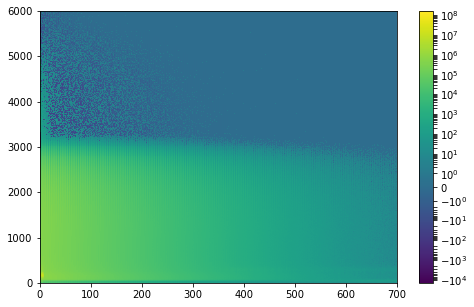

In [4]:
# ding.plothist2d(None, None, True, 1, ding.h_Kloss)
ding.plothist2d([0,1])
plt.colorbar()
plt.show()

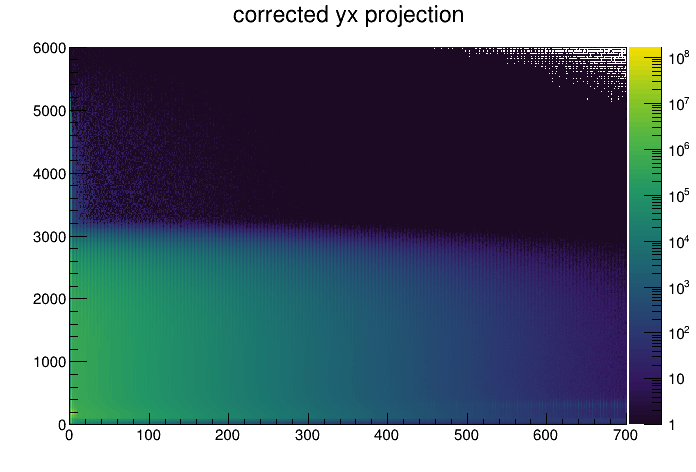

In [5]:
f = r.TFile(infile)
h = f.Get(histname).Clone()

c = r.TCanvas()
h.Project3D("yx").Draw("colz")
c.SetLogz()
c.Draw()

In [6]:
xlims=[30,650]
calo = 1
whichFit='5par'
whichCost='LeastSquares'
initialGuess=[  1.41236293e+07,  6.44282734e+01,  3.76792699e-01, -6.61887714e+01,
                5.30832191e+00, ]
blindingString='wow what a crazy blinding string this is!!!'
limits=[None, (0.1,1000), None, None, None ]

In [7]:
fitter = g2Fitter(whichFit, whichCost, blindingString, ding.project(0, None, [1700,3200], None), 
                  initialGuess, xlims, do_iterative_fit=False, fit_list=[5,8,13], fit_limits=limits,
                  final_unlimited_fit=False, 
                  triples_hist=ding.h_Kloss[:,bh.loc(calo)])

fitter.do_fit()

Projecting with: [None, [1700, 3200], None] -> [[0, 4692], [85, 161], [0, 24]]
Initializing fit!
(4692,) 1
[30, 650] -> [201, 4356] ( [(29.987212276214834, 30.136402387041773), (649.8721227621484, 650.0213128729753)] )
Starting fit...
<iminuit._libiminuit.Minuit object at 0x559f8743dba0> <iminuit.cost.LeastSquares object at 0x7faf42b36510>
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | N    |  14.12e6  |  0.14e6   |            |            |         |         |       |
| 1 | #tau |   64.4    |    0.6    |            |            |   0.1   |  1000   |       |
| 2 | A    |   0.377   |   0.004   |            |            |         |         |       |
| 3 | R    |   -66.2   |   -0.7    |            |            |         |         |       |
| 4 | #phi |   5.31  

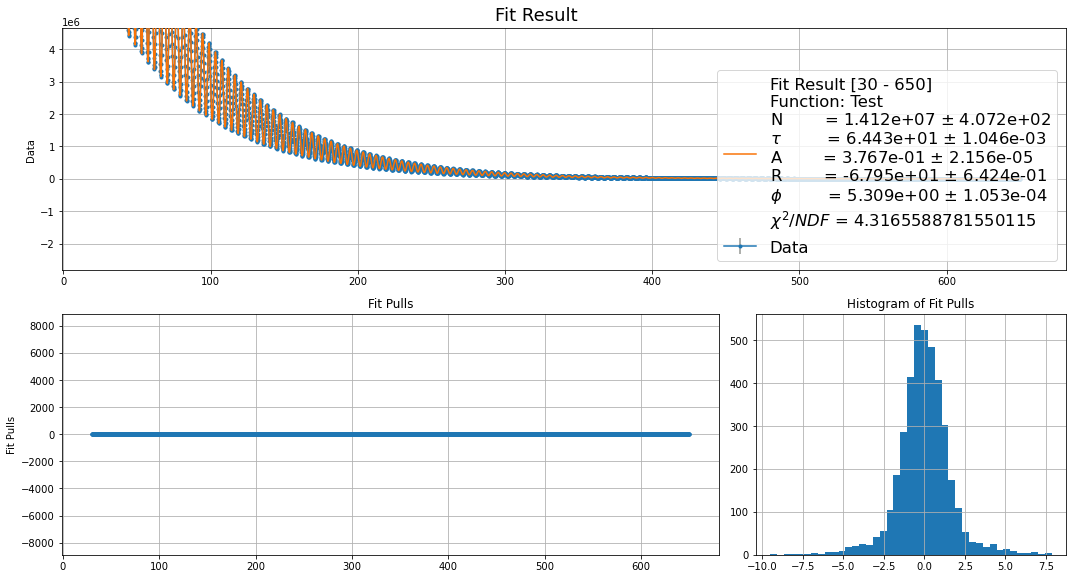

In [8]:
fitter.draw()
plt.show()

---

### Root results

In [9]:
# blinded instance
getBlinded = Blinders(FitType.Omega_a, blindingString)
def blinded_wiggle(x, p):
    norm  = p[0]
    life  = p[1]
    asym  = p[2]
    R     = p[3]
    phi   = p[4]
    
    time  = x[0]
    omega = getBlinded.paramToFreq(R)
#    omega = myBlinder.paramToFreq(R) unblind version
    
    return norm * math.exp(-time/life) * (1 - asym*math.cos(omega*time + phi))

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [10]:
func = r.TF1("func", blinded_wiggle, 30,600,5)
func.SetParNames('N','#tau','A','R','#phi')
func.SetParameters(1.41236293e+07,  6.44282734e+01,  3.76792699e-01, -6.61887714e+01, 5.30832191e+00)
# func.SetParLimits(4,-0.001 - 2*math.pi,2*math.pi+0.001)
func.SetParLimits(1,0.1,1000)
func.SetLineColor(2)
func.SetNpx(2000)

In [11]:
h.GetYaxis().SetRangeUser(1700,3200)
h_x = h.Project3D("x").Clone()

for i in range(2):
    h_x.Fit(func,"R")

 FCN=17624.4 FROM MIGRAD    STATUS=CONVERGED     124 CALLS         125 TOTAL
                     EDM=1.31586e-06    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.41219e+07   4.07841e+02   1.48124e+01  -3.67681e-06
   2  #tau         6.44314e+01   1.04927e-03   5.04444e-07  -4.51919e+02
   3  A            3.76729e-01   2.15595e-05   1.39728e-06  -3.72948e+01
   4  R           -6.79782e+01   6.44041e-01   2.35088e-02   2.45903e-03
   5  #phi         5.30873e+00   1.05489e-04   3.85047e-06   1.24705e+01
 FCN=17624.4 FROM MIGRAD    STATUS=CONVERGED      59 CALLS          60 TOTAL
                     EDM=1.5321e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  N            1.41219e+07   4

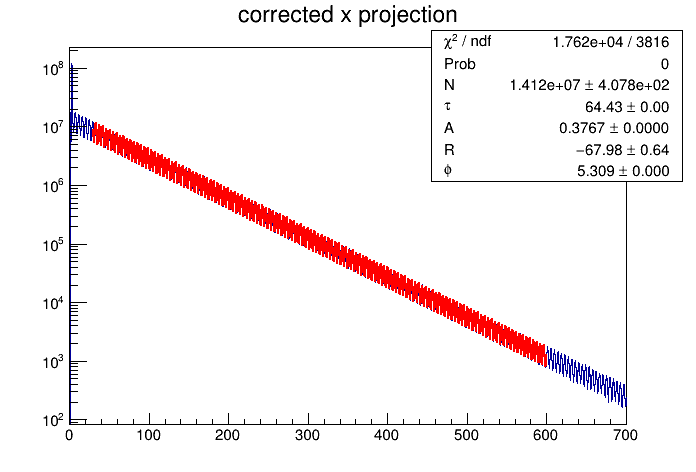

In [12]:
c = r.TCanvas()
h_x.Draw()
c.SetLogy()
c.Draw()

In [13]:
def getRootToNumpy(h):
    ding = []
    dong = []
    for i in range(h.GetNbinsX()):
        ding.append(h.GetBinContent(i))
        dong.append(h.GetBinError(i))
    return ding,dong

root_val, root_err = getRootToNumpy(h_x)

In [14]:
ding.h.axes[1].index(1700)

85

In [15]:
ding.h.view(flow=True).variance[:,ding.h.axes[1].index(1700):ding.h.axes[1].index(3200),:].shape

(4694, 75, 26)

In [16]:
other_python = ding.h[:,bh.loc(1700):bh.loc(3200):sum,::sum].project(0)

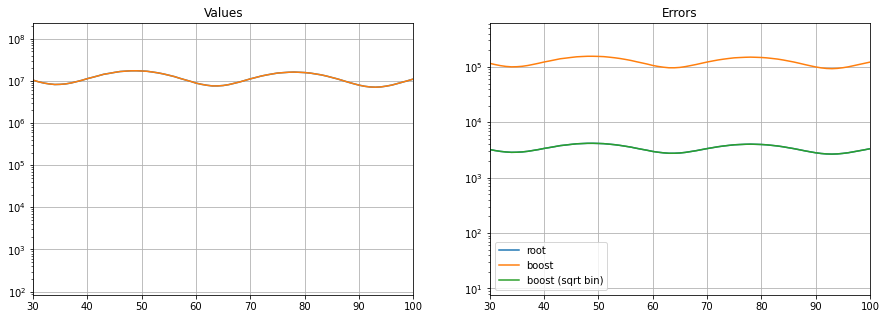

In [17]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
plt.sca(ax[0])
plt.plot(root_val,label="root")
plt.plot(fitter.h.view(flow=True).value,label='boost')
# plt.plot(other_python.view(flow=True).value,label='other')
plt.title("Values")
plt.yscale("log")
plt.grid()


plt.sca(ax[1])
plt.plot(root_err,label="root")
plt.plot(fitter.h.view(flow=True).variance,label='boost')
plt.plot(np.sqrt(fitter.h.view(flow=True).value),label='boost (sqrt bin)')
# plt.plot(other_python.view(flow=True).variance,label='other')
plt.title("Errors")
plt.legend()
plt.yscale("log")
plt.grid()

for axi in ax:
    axi.set_xlim(30,100)

plt.show()

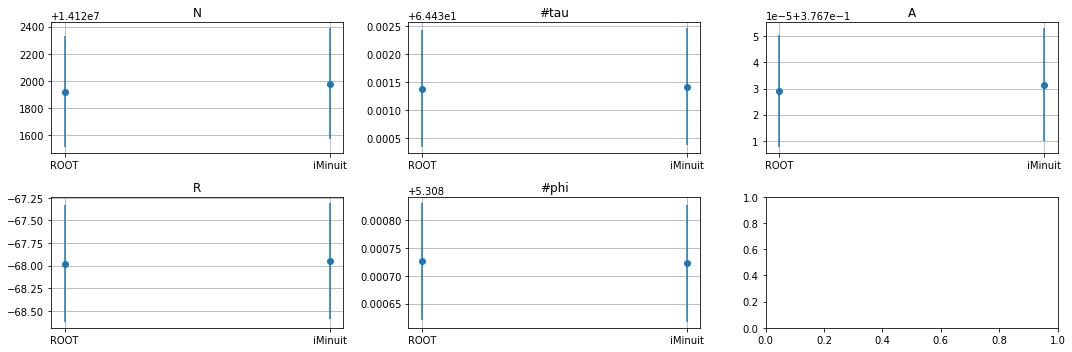

In [21]:
def compareRootAndMinuit(r, m):
    npar = m.values.size
    r_pars = [r.GetParameter(i) for i in range(npar)]
    r_errs = [r.GetParError(i) for i in range(npar)]
    fig,ax = plt.subplots(2,int(npar/2)+1,figsize=(15,5))
    zipped_pars = [x for x in zip(r_pars, m.values)]
    zipped_errs = [x for x in zip(r_errs, m.errors)]
    for i in range(npar):
        plt.sca(ax.ravel()[i])
        plt.errorbar(['ROOT', 'iMinuit'], zipped_pars[i], yerr=zipped_errs[i], fmt="o")
        plt.title(m.parNames[i])
        plt.grid()
    plt.tight_layout()
    plt.show()

compareRootAndMinuit(func, fitter)

In [30]:
for par in range(5):
    print(f"delta {fitter.parNames[par]} = ",(func.GetParameter(par) - fitter.values[par])/(func.GetParameter(par))*100,"%")

delta N =  -0.00042915628032126233 %
delta #tau =  -5.7902268206987234e-05 %
delta A =  -0.0006296952109031221 %
delta R =  0.0426998391040389 %
delta #phi =  6.674334733891348e-05 %
